# Finding Donor

CharityML is a fictitious charity organization located in the heart of Silicon Valley that was established to provide financial support for people eager to learn machine learning. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail. Your goal will be evaluate and optimize several different supervised learners to determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `fnlwgt` feature and records with missing or ill-formatted entrie

## Loading the Data

In [3]:
import pandas as pd 
import numpy as np

In [5]:
file = 'census.csv'
df = pd.read_csv(file)
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


**Featureset Exploration**

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

## Explorative Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [11]:
df.shape[0] # another way 

45222

In [13]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [15]:
# Finding values <=50k and >50k

less_equals_50k =df[df['income']=='<=50K'].shape[0] 
more_50k = df[df['income']=='>50K'].shape[0] 
percentage_more_50k =round((more_50k / df.shape[0]) * 100, 2) 

print(less_equals_50k)
print(more_50k)
print(percentage_more_50k)

34014
11208
24.78


In [17]:
# Another way of doing it

total_numbers_greater_50k = df['income'].value_counts()
percentage_greater_50k = df['income'].value_counts(1)

print(f'In total: {total_numbers_greater_50k}')
print('-' * 50)
print(f'In %: {percentage_greater_50k} ')

In total: income
<=50K    34014
>50K     11208
Name: count, dtype: int64
--------------------------------------------------
In %: income
<=50K    0.752156
>50K     0.247844
Name: proportion, dtype: float64 


In [19]:
# Are there any missing values

df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [21]:
# Are there any duplicates
df.duplicated().sum()

5982

In [23]:
# Dropping the duplicates
df = df.drop_duplicates() 

In [25]:
# Looking at numerical and categorical data in a fast statistic way
df.describe(include = ['number']).T

,count,mean,std,min,25%,50%,75%,max
age,39240.0,39.309225,13.298041,17.0,29.0,38.0,48.0,90.0
education-num,39240.0,10.136290,2.637194,1.0,9.0,10.0,13.0,16.0
capital-gain,39240.0,1253.314246,7993.997264,0.0,0.0,0.0,0.0,99999.0
capital-loss,39240.0,101.261340,431.434412,0.0,0.0,0.0,0.0,4356.0
hours-per-week,39240.0,41.206091,12.458021,1.0,40.0,40.0,45.0,99.0


In [27]:
df.describe(include = ['object']).T

,count,unique,top,freq
workclass,39240,7,Private,27717
education_level,39240,16,HS-grad,12003
marital-status,39240,7,Married-civ-spouse,17947
occupation,39240,14,Prof-specialty,5516
relationship,39240,6,Husband,15645
race,39240,5,White,33064
sex,39240,2,Male,26097
native-country,39240,41,United-States,35340
income,39240,2,<=50K,29265


## Univariate Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

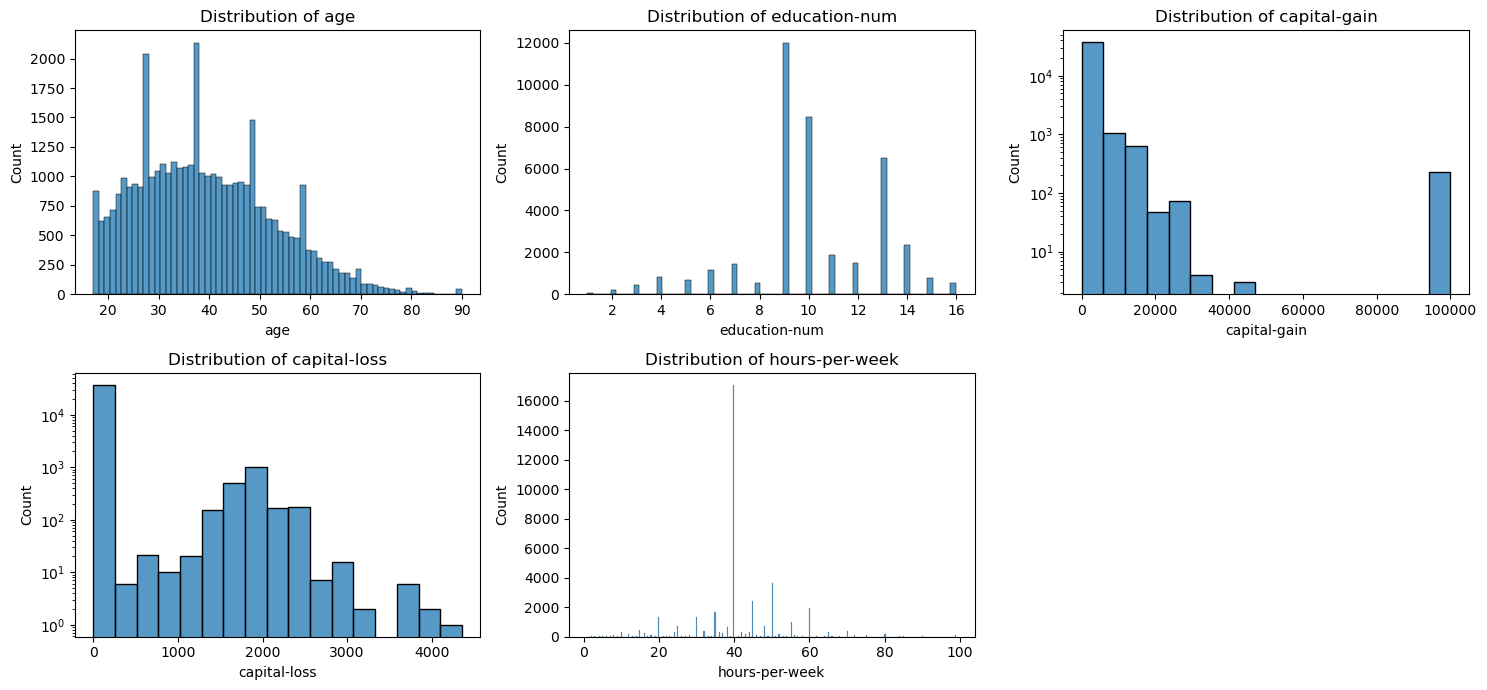

In [31]:
# plotting numerical features

def plot_numerical_features(data):
    
    # Create numerical feature list
    num_features = data.select_dtypes(include=['number']).columns.to_list()
    
    # Define the grid
    cols = 3
    rows = (len(num_features) // cols) + (1 if len(num_features) % cols > 0 else 0)
    
    # Create figure an subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 7)) 
    axes = axes.flatten()
    
    # Plot the visuals
    for i, feature in enumerate(num_features):
        if feature in ['capital-gain','capital-loss']:
            sns.histplot(data=data, x=feature, ax=axes[i]) # you can also write sns.histplot(data=data[feature], ax=axis[i])
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_yscale('log')  # use log-scale
        
        else:
            sns.histplot(data=data, x=feature, ax=axes[i]) # you can also write sns.histplot(data=data[feature], ax=axis[i])
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)

    # Delete plots which are to many
    for i in range(len(num_features), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Call function
plot_numerical_features(df)


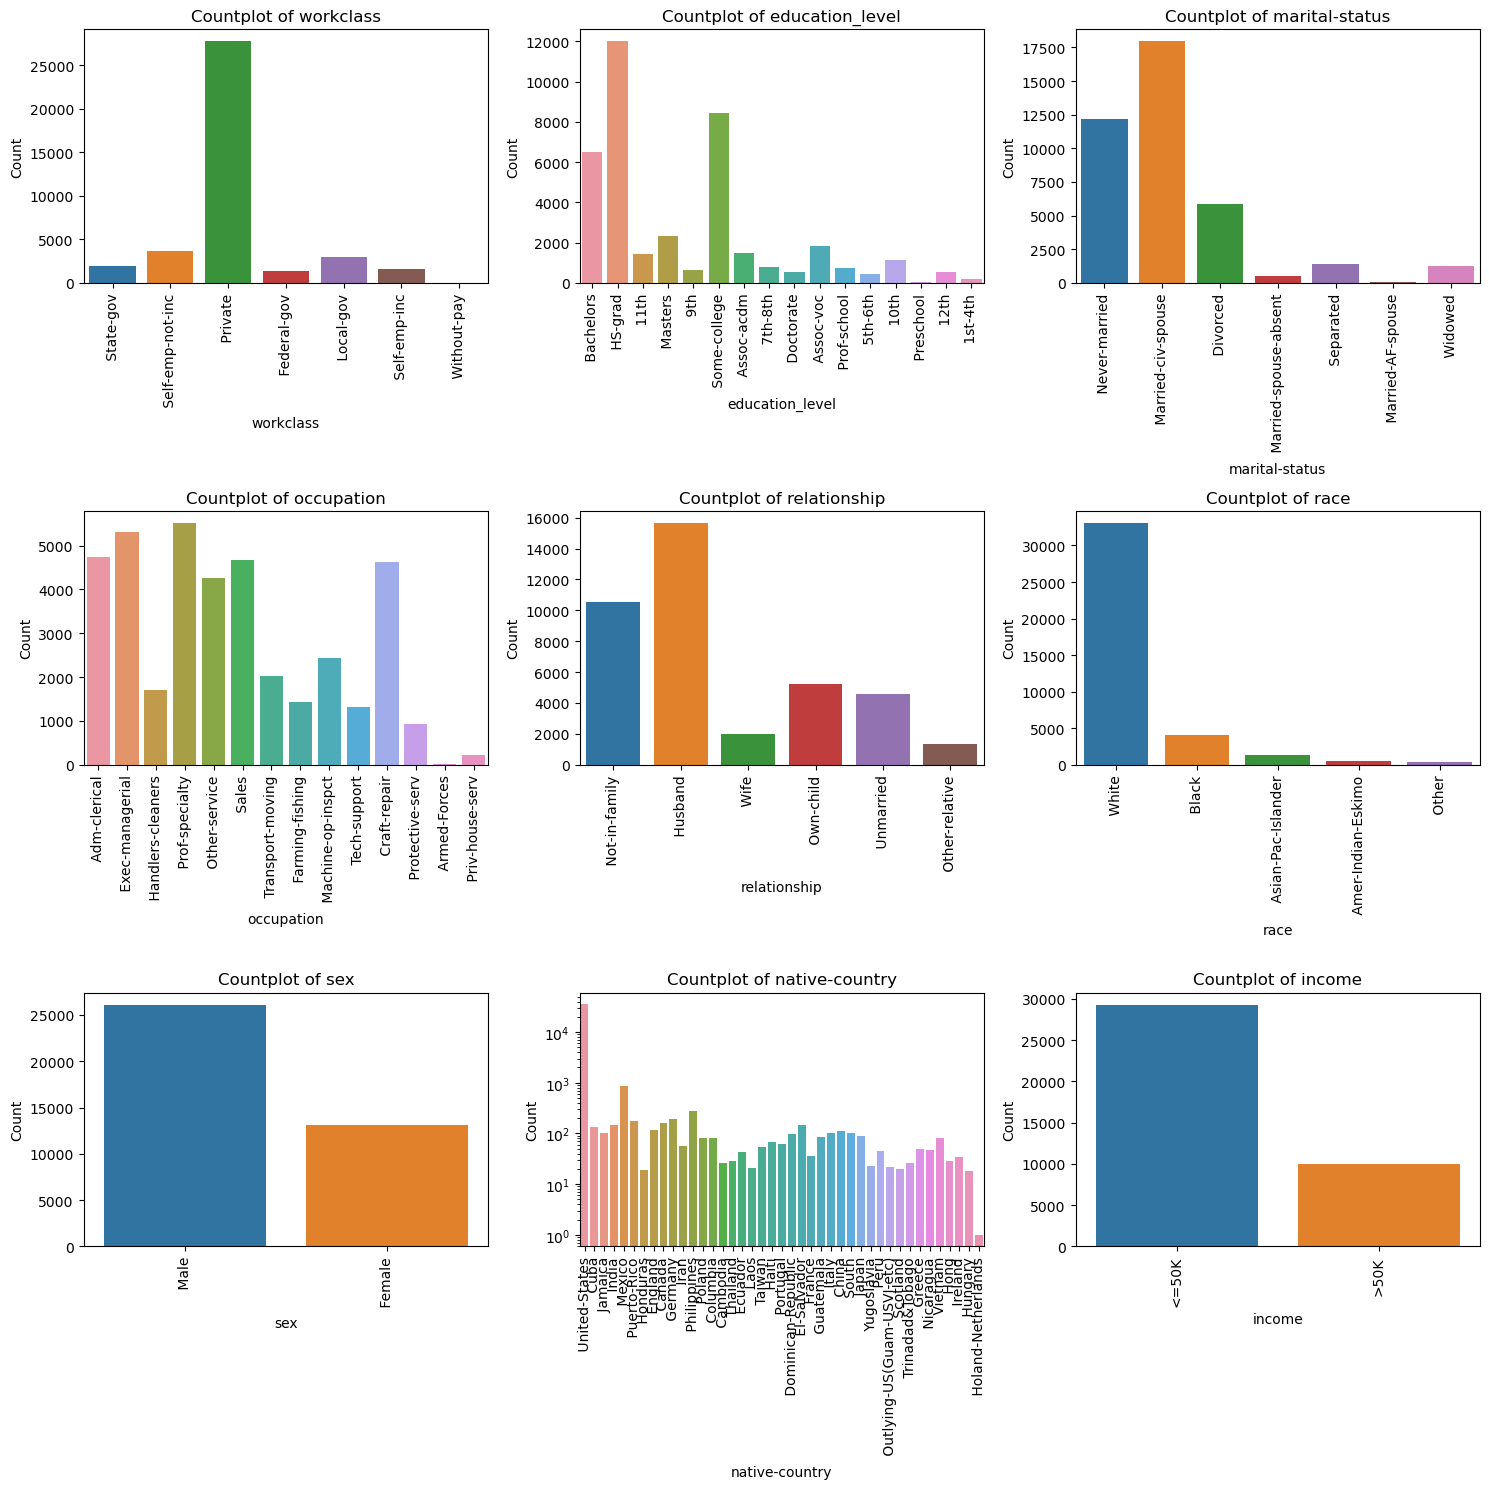

In [34]:
# plotting categorical features

def plot_categorical_features(data): # we need data to work with, so we will pass our data to the function
    
    # Create numerical feature list
    cat_features = data.select_dtypes(include=['object']).columns.to_list()
    
    # Define the grid
    cols = 3
    rows = (len(cat_features) // cols) + (1 if len(cat_features) % cols > 0 else 0) # // Florr Division Operator = without decimal points
    
    # Create figure and subplots
    fig, axes = plt.subplots(cols, rows, figsize=(15 ,15))
    axes = axes.flatten() # turn it into a numpy array 
    
    # Plot the visuals
    for i, features in enumerate(cat_features):
        
        if features == 'native-country':
            sns.countplot(data=data, x=features, ax=axes[i])
            axes[i].set_title(f'Countplot of {features}')
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=90) 
            axes[i].set_yscale('log')  # use log-scale
        
        else:
            sns.countplot(data=data, x=features, ax=axes[i])
            axes[i].set_title(f'Countplot of {features}')
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=90) 
        
    
    # Delete plots which are to many
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_categorical_features(df)    

**Observations and Insights**

**Numerical Features**:

- Age:
    - Distribution: The age distribution is slightly right-skewed, with a higher concentration of individuals between 20 and 50 years of age.
    - Insight: Most individuals fall within the working age group. Older individuals (above 50) are less frequent, and few people are in the age range above 70.
    - Recommendation: Age can be used as is, but it may not require transformations since the skewness is not too strong.

- Education-Num:
  - Distribution: The educational levels are concentrated around certain key values (e.g., 10-12 years), suggesting that most people have a moderate education.
  - Insight: The spikes in education levels likely correspond to specific formal education degrees.
  - Recommendation: No transformation is required. This feature appears to have meaningful categories that align well with different education levels.

- Capital-Gain (Logarithmic Scale):
  - Distribution: Strong right-skewness is evident with most individuals reporting little to no capital gains. There is a small proportion with high gains.
  - Insight: The right-skew suggests a few wealthy individuals with significant capital gains.
  - Recommendation: Apply a logarithmic transformation to address the extreme skewness and better capture the relationship between capital gains and income.

- Capital-Loss (Logarithmic Scale):
  - Distribution: Like capital-gain, capital-loss is also right-skewed with most individuals reporting no losses, and a small proportion with significant capital losses.
  - Insight: The distribution mirrors that of capital-gain, indicating that a minority of individuals are involved in financial activities leading to capital losses.
   - Recommendation: Similarly, apply a logarithmic transformation to normalize the skewness and better model this feature.

- Hours-Per-Week:
   - Distribution: There is a notable spike at 40 hours, reflecting the standard full-time workweek. There are also smaller peaks at higher values like 50 and 60 hours.
   - Insight: The hours-per-week data show that most people work a standard number of hours, with fewer individuals working significantly more or less.
   - Recommendation: This feature can be left as is since it is well distributed with no significant skew
   
**Categorical Features**:

- Workclass:
    - Observation: The majority of individuals belong to the "Private" workclass, followed by "Self-emp-not-inc" and "Local-gov". There is a large imbalance between classes.
    - Insight: The imbalance in workclass categories suggests that this feature could influence income prediction. To handle this, one-hot encoding should be applied, but care should be taken with the rare classes, which could be grouped or handled separately.

- Education Level:
    - Observation: Most individuals have a high school education or some college, with fewer individuals achieving a Bachelor’s degree or higher.
    - Insight: Education is likely to be a critical factor in income prediction. One-hot encoding should be applied, and you could consider grouping less frequent education levels to reduce the dimensionality of the feature.

- Marital Status:
    - Observation: A large portion of individuals are married, while smaller groups fall into categories such as "Never-married" or "Divorced".
    - Insight: Marital status may have predictive power, and should be one-hot encoded. No further transformation is necessary.

- Occupation:
    - Observation: There is a wide variety of occupations, with "Prof-specialty", "Exec-managerial", and "Adm-clerical" being the most common. There is some imbalance between occupation categories.
    - Insight: Occupation could be a highly informative feature for predicting income. One-hot encoding should be used, and occupations with very few entries could be grouped to prevent the curse of dimensionality.

- Relationship:
    - Observation: The majority of individuals are labeled as "Husband", with other categories such as "Not-in-family" and "Wife" making up smaller portions.
    - Insight: Relationship could be indicative of income levels and should be included in the model. One-hot encoding is recommended.

- Race:
   - Observation: The majority of individuals are categorized as "White", with other racial groups like "Black" and "Asian-Pac-Islander" being less represented.
   - Insight: This imbalance could affect model training. While one-hot encoding can be used, it may be beneficial to investigate whether race has a strong correlation with income in this specific dataset.

- Sex:
    - Observation: There is an imbalance between males and females, with more males represented in the dataset.
    - Insight: Sex may be an important feature in predicting income, especially if males tend to earn more than females. One-hot encoding should be applied.

- Native Country:

   - Observation: The majority of individuals are from the "United States", with other countries having very small representations.
   - Insight: Native country might not add significant value to the model due to the overwhelming majority from the US. Countries with very few entries could be grouped as "Other" to reduce noise in the model. One-hot encoding can be applied

## Bivariate Analysis

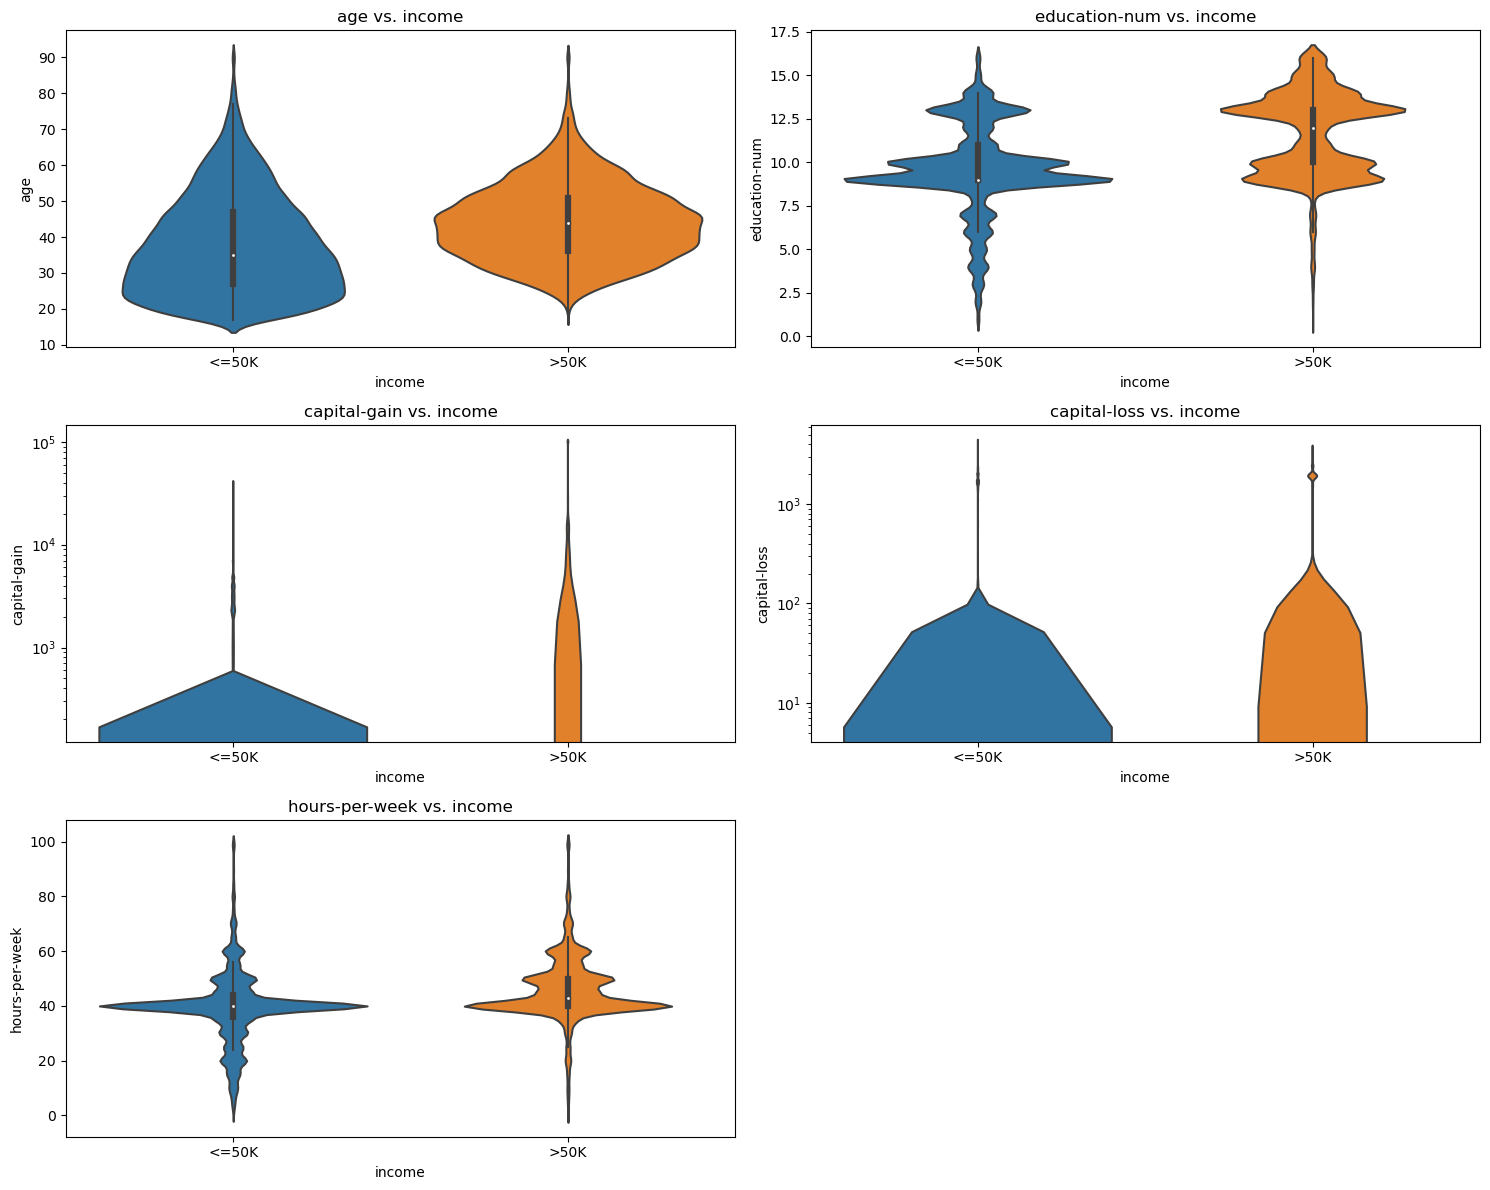

In [38]:
# For numerical data
num_features = df.select_dtypes(include=[np.number]).columns.to_list()

plt.figure(figsize=(15,12))

for i, feature in enumerate(num_features, 1):
    if feature in ['capital-gain', 'capital-loss']:
            plt.subplot(3, 2, i)
            sns.violinplot(x='income', y=feature, data=df, split=True)
            plt.title(f'{feature} vs. income')
            plt.gca().set_yscale('log')
            
    else:
        plt.subplot(3, 2, i)
        sns.violinplot(x='income', y=feature, data=df, split=True)
        plt.title(f'{feature} vs. income')
    
plt.tight_layout()
plt.show()

**Observations and Insights**:

Based on the Violin Plots for the features relative to the target variable income (<=50K or >50K), here are the key observations and insights:

- Age vs. Income:
     - Distribution: The age distribution shows that individuals earning >50K tend to be older compared to those earning <=50K. The median age for the >50K group is notably higher.
     - Insight: Age seems to be a relevant feature for predicting income. People in the older age groups are more likely to earn >50K, while younger individuals tend to earn <=50K.

- Education-Num vs. Income:
     - Distribution: There is a clear distinction between the educational levels of the two income groups. Individuals with higher income (>50K) generally have more years of education compared to those earning <=50K.
     - Insight: Education is a strong indicator of income level. Higher educational attainment is correlated with earning more than 50K, making this feature highly relevant for the model.

- Capital-Gain vs. Income (Logarithmic Scale):
     - Distribution: The capital gain distribution shows that the majority of individuals with <=50K income have little to no capital gains, while those earning >50K are more likely to report significant capital gains.
     - Insight: Capital gain is a critical differentiator between income groups. The feature is highly relevant for the model, as individuals with higher capital gains are more likely to belong to the >50K income group.

- Capital-Loss vs. Income (Logarithmic Scale):
    - Distribution: Similar to capital gain, capital loss shows a notable distinction between the two income groups. Individuals earning >50K are more likely to report capital losses than those earning <=50K.
    - Insight: Capital loss is another significant indicator of income level, as it reflects investment activity often associated with higher earners. This feature should be included in the model.

- Hours-Per-Week vs. Income:
   - Distribution: Both income groups have a similar distribution around 40 hours per week, but those earning >50K tend to work more hours, with a broader distribution above 40 hours.
    - Insight: While there is some distinction, hours worked per week seems to have a weaker correlation with income compared to other features. However, it may still provide useful information in combination with other features.

**Recommendations for Feature Selection**:

Based on the analysis, the following features appear to be most relevant for predicting income:

- Education-Num: This feature shows a strong correlation with higher income levels and should be considered a key predictor.

- Capital-Gain: The clear distinction between the income groups and its strong relationship with income make this feature highly relevant.

- Capital-Loss: Similar to capital gain, capital loss is important in distinguishing higher earners and should be included in the model.

- Age: Older individuals are more likely to earn more, making age a useful predictor.

- Hours-Per-Week: While this feature is less significant compared to the others, it can still provide additional predictive power, particularly when combined with other features

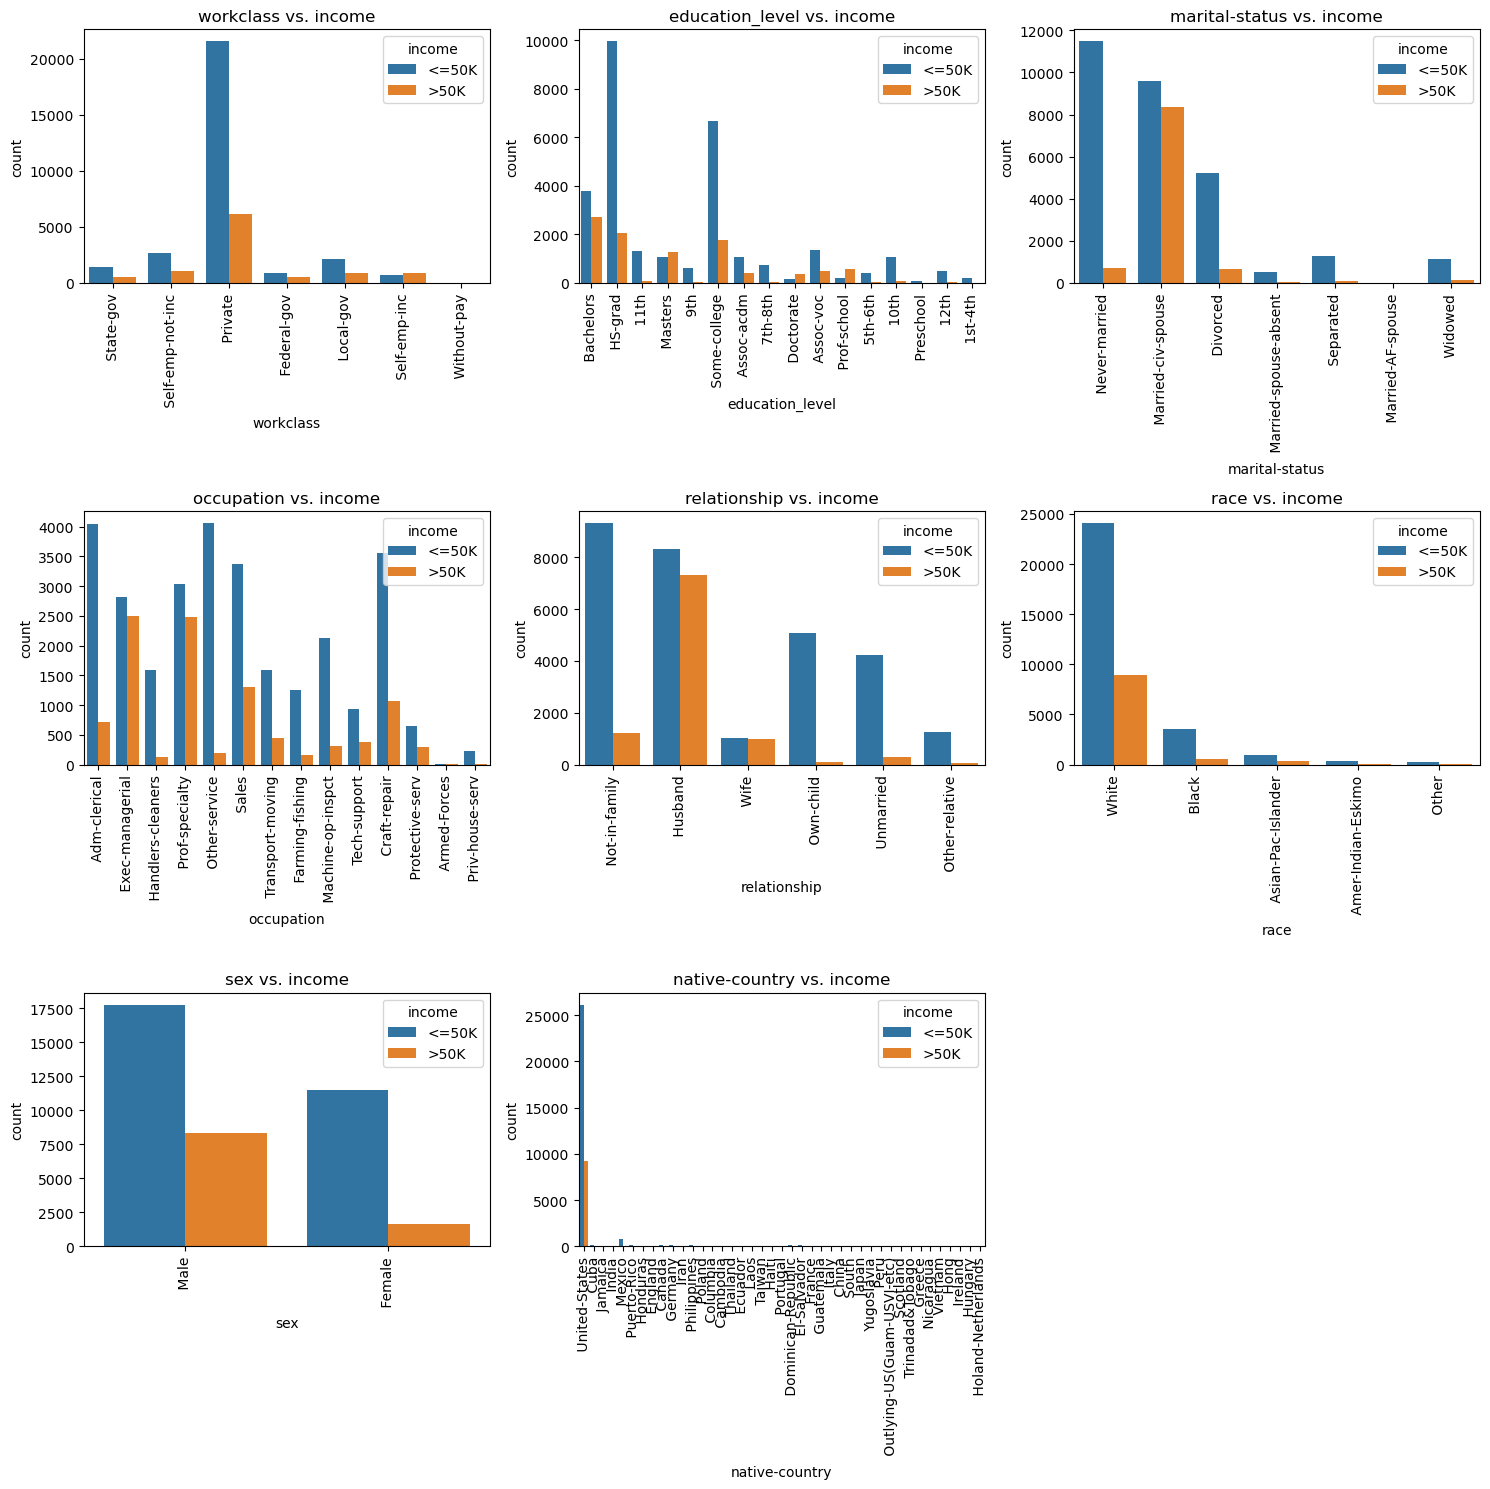

In [40]:
# For categorical data

cat_features = df.select_dtypes(include=['object']).columns.to_list()
cat_features.remove('income')

plt.figure(figsize=(15, 15))

for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='income', data=df)
    plt.title(f'{feature} vs. income')
    plt.xticks(rotation=90) 
    
plt.tight_layout()
plt.show()


**Observations and Insights**

- Workclass vs. Income:
    - Observation: The majority of individuals in the "Private" workclass earn <=50K. However, the "Self-emp-inc" and "Federal-gov" classes show a higher proportion of individuals earning >50K.
    - Insight: Workclass is a strong indicator for income levels. Self-employed individuals (especially incorporated) and those in federal government jobs are more likely to earn >50K. This feature should be retained in the model, with categories like "Self-emp-inc" and "Federal-gov" having a higher predictive value for higher income.

- Education Level vs. Income:
    - Observation: Higher education levels, such as "Doctorate", "Prof-school", and "Masters", are associated with a higher proportion of individuals earning >50K. Meanwhile, individuals with lower education levels like "HS-grad" and "Some-college" tend to earn <=50K.
    - Insight: Education level is a highly informative feature for predicting income. It should be retained and possibly encoded with greater detail, as higher education levels correlate strongly with earning >50K.

- Marital Status vs. Income:
    - Observation: Individuals who are "Married-civ-spouse" show a higher proportion of earning >50K, while those who are "Never-married" or "Divorced" have a higher likelihood of earning <=50K.
    - Insight: Marital status is a useful predictor for income. Specifically, being married is a positive indicator for higher income, while being divorced or never married correlates with lower income.

- Occupation vs. Income:
    - Observation: Certain occupations, such as "Exec-managerial" and "Prof-specialty", show a higher proportion of individuals earning >50K, whereas occupations like "Other-service", "Handlers-cleaners", and "Farming-fishing" are associated with lower income (<=50K).
    - Insight: Occupation is a highly predictive feature for income. Occupations such as "Exec-managerial" and "Prof-specialty" are strong indicators of high income and should be carefully encoded.

- Relationship vs. Income:
    - Observation: Individuals labeled as "Husband" have a higher likelihood of earning >50K, while those categorized as "Not-in-family", "Own-child", or "Unmarried" are more likely to earn <=50K.
   - Insight: The relationship feature provides important context for predicting income. Specifically, individuals categorized as "Husband" are likely to earn more, while those outside of a family structure (e.g., "Not-in-family" or "Own-child") tend to earn less.

- Race vs. Income:
    - Observation: The majority of individuals across racial groups earn <=50K. However, a slightly higher proportion of "White" and "Asian-Pac-Islander" individuals earn >50K compared to other races.
   - Insight: While race does show some differences in income distribution, it may not be as strong a predictor as other features. It could be useful when combined with other demographic factors, but care should be taken when interpreting this feature due to potential biases.

- Sex vs. Income:
    - Observation: Males have a significantly higher proportion of individuals earning >50K compared to females. The majority of females earn <=50K.
    - Insight: Sex is an important predictor for income, with males more likely to earn >50K. This feature should be retained for model building, as it provides a clear distinction in income levels.

- Native Country vs. Income:
    - Observation: The vast majority of individuals are from the "United States", with smaller proportions from other countries. In most cases, individuals from countries other than the US have a higher likelihood of earning <=50K.
    - Insight: Native country may not be a strong predictor of income due to the overwhelming number of individuals from the US. For countries with very few observations, it may be useful to group them into an "Other" category to avoid overfitting
    

## Preparing the Data

In [19]:
# Splitting dataset into features for prediction and target variable
target = df['income']
features = df.drop('income', axis=1) #axis 1 -> column

In [20]:
# Using Log-Transformation for skewed continous features
import numpy as np

log_features = ['capital-gain', 'capital-loss']
features[log_features] = features[log_features].apply(np.log1p) # Log Transformation mit np.log1p

In [21]:
# Normalizing numerical data and encoding of categorical data

from sklearn.preprocessing import StandardScaler

numerical_features = features.select_dtypes(include=['int64', 'float64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

# Normalizing
scaler = StandardScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])

# One-hot Encoding
features = pd.get_dummies(features, columns=categorical_features)
features = features.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [22]:
features

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.023254,1.085907,2.614061,-0.239027,-0.096814,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.803946,1.085907,-0.322840,-0.239027,-2.264120,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.098454,-0.430876,-0.322840,-0.239027,-0.096814,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.029546,-1.189268,-0.322840,-0.239027,-0.096814,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.850454,1.085907,-0.322840,-0.239027,-0.096814,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,0.653546,1.465102,-0.322840,-0.239027,-0.096814,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,-0.474454,1.085907,-0.322840,-0.239027,-0.096814,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,-0.023254,1.085907,-0.322840,-0.239027,-0.417896,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.352746,1.085907,2.965539,-0.239027,-0.096814,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# Data Shuffling

from sklearn.model_selection import train_test_split

# First we split the dataset into trainings- and test data
features_train, features_test, target_train, target_test = train_test_split(
                                                           features, target, test_size=0.2, 
                                                           random_state=42)

# Now we split the training data into training an validation data
features_train, features_val, target_train, target_val = train_test_split(
                                                         features_train, target_train, test_size=0.25,
                                                         random_state=42)

print(f"Train size: {features_train.shape}, Validation size: {features_val.shape}, Test size: {features_test.shape}")

Train size: (23544, 103), Validation size: (7848, 103), Test size: (7848, 103)


## Machine Learning Models

**Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [37]:
# Training the model
classifier = DecisionTreeClassifier(random_state=42) # initialize the model
classifier.fit(features_train, target_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Validation on the validation set
target_val_pred = classifier.predict(features_val)

In [44]:
# Evaluation for the validation dataset
cm_val = confusion_matrix(target_val, target_val_pred)
print("\nClassification Report (Validation):\n")
print(classification_report(target_val, target_val_pred, target_names=['<=50K', '>50K']))


Classification Report (Validation):

              precision    recall  f1-score   support

       <=50K       0.86      0.86      0.86      5828
        >50K       0.60      0.60      0.60      2020

    accuracy                           0.79      7848
   macro avg       0.73      0.73      0.73      7848
weighted avg       0.79      0.79      0.79      7848



In [47]:
# Hyperparameter tuning

param_grid = {
    'max_depth': [3, 5, 10, None],               # Depth of tree
    'min_samples_split': [2, 5, 10],             # Min of sample leafes
    'criterion': ['gini', 'entropy'],            # Criteria
}

# GridSearchCV: 
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Search: Training + Validierung
grid_search.fit(features_train, target_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [49]:
best_model = grid_search.best_estimator_
target_val_pred = best_model.predict(features_val)

print("\nClassification Report (Validation):")
print(classification_report(target_val, target_val_pred, target_names=['<=50K', '>50K']))


Classification Report (Validation):
              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      5828
        >50K       0.78      0.56      0.65      2020

    accuracy                           0.84      7848
   macro avg       0.82      0.75      0.77      7848
weighted avg       0.84      0.84      0.84      7848



In [50]:
# Test it on the test dataset
target_test_pred = best_model.predict(features_test)


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      5883
        >50K       0.76      0.59      0.67      1965

    accuracy                           0.85      7848
   macro avg       0.82      0.76      0.79      7848
weighted avg       0.85      0.85      0.84      7848



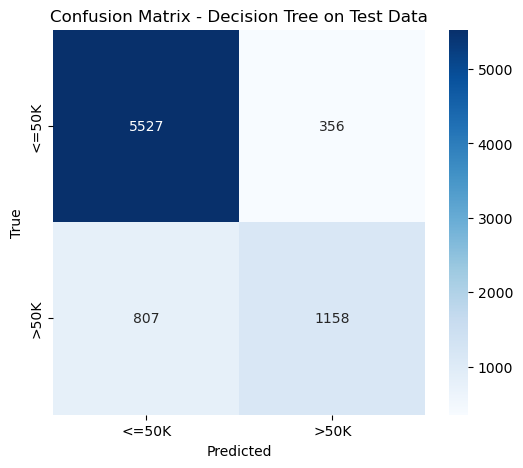

In [53]:
print("\nClassification Report (Test):")
print(classification_report(target_test, target_test_pred, target_names=['<=50K', '>50K']))

# Evaluation
cm = confusion_matrix(target_test, target_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree on Test Data')
plt.show()

**Random Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [57]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # initializes the model
rf_classifier.fit(features_train, target_train)

RandomForestClassifier(random_state=42)

In [58]:
# Validation on the validation set
target_val_pred = rf_classifier.predict(features_val)

In [60]:
# Evaluation for the validation dataset
print("\nClassification Report (Validation):\n")
print(classification_report(target_val, target_val_pred, target_names=['<=50K', '>50K']))


Classification Report (Validation):

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      5828
        >50K       0.68      0.60      0.64      2020

    accuracy                           0.82      7848
   macro avg       0.77      0.75      0.76      7848
weighted avg       0.82      0.82      0.82      7848



In [62]:
# Hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],         
    'max_depth': [None, 10, 20],             
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'criterion': ['gini', 'entropy']         
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                              cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search_rf.fit(features_train, target_train)

print("Best Hyperparameters found by GridSearchCV:", grid_search_rf.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [63]:
best_rf_model = grid_search_rf.best_estimator_
target_val_pred = best_rf_model.predict(features_val)

print("\nClassification Report (Validation) for Best RF Model:")
print(classification_report(target_val, target_val_pred, target_names=['<=50K', '>50K']))


Classification Report (Validation) for Best RF Model:
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      5828
        >50K       0.78      0.60      0.68      2020

    accuracy                           0.85      7848
   macro avg       0.82      0.77      0.79      7848
weighted avg       0.85      0.85      0.85      7848



In [64]:
# Test it on the test dataset
target_test_pred = best_rf_model.predict(features_test)


Classification Report (Test):
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      5883
        >50K       0.77      0.63      0.70      1965

    accuracy                           0.86      7848
   macro avg       0.83      0.79      0.80      7848
weighted avg       0.86      0.86      0.86      7848



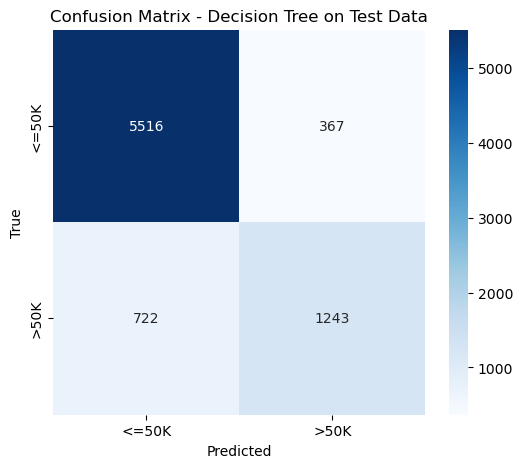

In [65]:
print("\nClassification Report (Test):")
print(classification_report(target_test, target_test_pred, target_names=['<=50K', '>50K']))

# Evaluation
cm = confusion_matrix(target_test, target_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree on Test Data')
plt.show()